In [189]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv('Flight_Train.csv')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
data.groupby(['Source','Destination'])['Total_Stops'].agg(pd.Series.mode)

Source    Destination
Banglore  Delhi          non-stop
          New Delhi        1 stop
Chennai   Kolkata        non-stop
Delhi     Cochin           1 stop
Kolkata   Banglore         1 stop
Mumbai    Hyderabad      non-stop
Name: Total_Stops, dtype: object

In [11]:
data['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [12]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [14]:
data.groupby(['Source','Destination','Duration'])['Total_Stops'].agg(pd.Series.mode)

Source    Destination  Duration
Banglore  Delhi        10h 10m      1 stop
                       10h 15m      1 stop
                       10h 25m      1 stop
                       10h 30m     2 stops
                       10h 35m      1 stop
                                    ...   
Mumbai    Hyderabad    8h           1 stop
                       8h 15m       1 stop
                       8h 20m      2 stops
                       9h 20m      2 stops
                       9h 5m       2 stops
Name: Total_Stops, Length: 768, dtype: object

In [18]:
data['Total_Stops'] = data.groupby(['Source','Destination'])['Total_Stops'].transform(lambda x: x.fillna(x.agg(pd.Series.mode)))

In [19]:
data['Total_Stops'].isna().sum()

1

In [24]:
data[data['Total_Stops'] == np.nan]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [25]:
data[data['Total_Stops'].isna() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [27]:
data.groupby(['Source','Destination'])['Total_Stops'].agg(pd.Series.mode)

Source    Destination
Banglore  Delhi          non-stop
Chennai   Kolkata        non-stop
Delhi     Cochin           1 stop
Kolkata   Banglore         1 stop
Mumbai    Hyderabad      non-stop
Name: Total_Stops, dtype: object

In [28]:
data['Total_Stops'] = data.groupby(['Source','Destination'])['Total_Stops'].transform(lambda x: x.fillna(x.agg(pd.Series.mode)))

In [29]:
data['Total_Stops'].isna().sum()

1

In [ ]:
# replacing null value wih group by mode was not working. so did manually using loc 

In [32]:
data.loc[9039,'Total_Stops'] = '1 stop'

In [33]:
data['Total_Stops'].isna().sum()

0

In [34]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [35]:
data.groupby(['Source','Destination'])['Route'].agg(pd.Series.mode)

Source    Destination
Banglore  Delhi                BLR ? DEL
Chennai   Kolkata              MAA ? CCU
Delhi     Cochin         DEL ? BOM ? COK
Kolkata   Banglore       CCU ? BOM ? BLR
Mumbai    Hyderabad            BOM ? HYD
Name: Route, dtype: object

In [36]:
data['Route'] = data.groupby(['Source','Destination'])['Route'].transform(lambda x:x.fillna(x.agg(pd.Series.mode)))

In [37]:
data['Route'].isna().sum()

1

In [39]:
data[data['Route'].isna()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


In [41]:
data.loc[9039,'Route'] = 'DEL ? BOM ? COK'

In [42]:
data['Route'].isna().sum()

0

In [43]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# null values are fixed 

<Axes: >

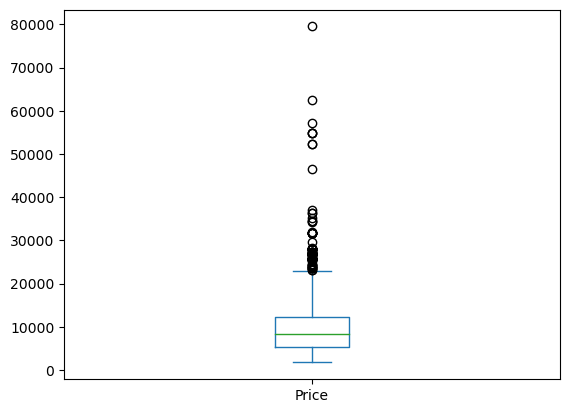

In [45]:
data.plot(kind = 'box')

In [ ]:
# All the x variables are categorical. So, we need to perform One-Hot Encoding.
# Before Encoding, feature selection needs to be done

In [47]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [48]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
# All are unique values in Airline,Source,Destination column and no replace required.

In [ ]:
# Date of Journey - are all falling in same year (2019). So on a high level this column doesn't have much significance with Flight rate prediction. 
# However, we can exract month detail from Date feature by which we can identify if there is any spike in rate since any particular month.
# now, how to identfy Month from Date ?

In [51]:
data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [57]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],dayfirst = True)

In [61]:
data['Month'] = data['Date_of_Journey'].dt.month

In [62]:
data['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [63]:
data['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [ ]:
data.drop(columns ='Date_of_Journey')

In [72]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,Banglore,Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May
4,IndiGo,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March


In [75]:
data['Route'].nunique()

128

In [ ]:
# There are 128 unique categorical value for Route. If we do One-Hot Encoding it is going to be very complex
# Also, Route can be covered under other columns : Source, Destination,Duration, Total_Stops
# So dropping Route column

In [76]:
data.drop(columns = 'Route')

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,May
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,March
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,April
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,April
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,April
10681,Vistara,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,March


In [ ]:
# now, totally 2 columns has been dropped -  Date of Journey (replaced with month column) and Route

In [78]:
data['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [81]:
data['Dep_Time'].nunique()

222

In [80]:
data['Arrival_Time'].nunique()

1343

In [88]:
data['Dep_Time'].replace ([data[data['Dep_Time'] < '12:00' =='True']],'AM')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [103]:
data[data['Dep_Time'] < '12:00' == True]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [104]:
data[data['Dep_Time'] < '12:00']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,June
7,Jet Airways,Banglore,Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,March
8,Jet Airways,Banglore,Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,March
...,...,...,...,...,...,...,...,...,...,...,...
10676,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,10:20,19:00,8h 40m,1 stop,No info,9794,May
10677,SpiceJet,Banglore,Delhi,BLR ? DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257,May
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,April
10681,Vistara,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,March


In [110]:
data['Dep_Time'].replace({data['Dep_Time'] < '12:00':'AM'})

TypeError: unhashable type: 'Series'

In [111]:
type(data['Dep_Time'])

pandas.core.series.Series

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Month            10683 non-null  object
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [113]:
data['Dep_Time'].replace({[x for x in data['Dep_Time'] if data['Dep_Time'] < '12:00']:'AM'})

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Arrival_Time, Dep_Time both will follow the same method to convert the values to categorical 'AM','PM', 'Peek Hours' etc
# For now, I am ignoring these 2 columns - Arrival_Time, Dep_Time

In [114]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [115]:
del data['Route']

In [116]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Month'],
      dtype='object')

In [118]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
# Now trying to work on column : Duration - need to change hours minutes to minutes

In [ ]:
'''example reference from Internet:
------------------------------------
s=pd.to_datetime(df.Time.replace({'hours':'hour'},regex=True),format='%H hour %M mins')
s.dt.hour*60+s.dt.minute
'''

In [119]:
data['Duration'] = pd.to_datetime(data['Duration'],format='%H h %M m')

ValueError: time data '2h 50m' does not match format '%H h %M m' (match)

In [ ]:
'''Another Example from Internet :
--------------------------------
df['new1'] = (pd.to_timedelta(df['Col_name']).dt.seconds // 60).astype(str) + 'm'
print (df)
'''

In [123]:
data['Duration_Min'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(str)

In [124]:
data['Duration_Min'] 

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Min, Length: 10683, dtype: object

In [ ]:
# Successfully found a final way :)

In [126]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,May,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,May,325
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,March,285


In [ ]:
# now dropping column Duration 

In [127]:
del data['Duration']

In [128]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,May,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,June,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,May,325
4,IndiGo,Banglore,Delhi,16:50,21:35,1 stop,No info,13302,March,285


In [130]:
del data['Dep_Time']

In [131]:
del data['Arrival_Time']

In [132]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,March,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,May,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,June,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,May,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,March,285


In [133]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
# not considering this col : Additional_Info for simplicity 

In [134]:
data.drop(columns = 'Additional_Info')

,Airline,Source,Destination,Total_Stops,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,non-stop,3897,March,170
1,Air India,Kolkata,Banglore,2 stops,7662,May,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,June,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,May,325
4,IndiGo,Banglore,Delhi,1 stop,13302,March,285
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,April,150
10679,Air India,Kolkata,Banglore,non-stop,4145,April,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,April,180
10681,Vistara,Banglore,Delhi,non-stop,12648,March,160


In [136]:
data_new = data.drop(columns = 'Additional_Info')

In [137]:
data_new

,Airline,Source,Destination,Total_Stops,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,non-stop,3897,March,170
1,Air India,Kolkata,Banglore,2 stops,7662,May,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,June,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,May,325
4,IndiGo,Banglore,Delhi,1 stop,13302,March,285
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,April,150
10679,Air India,Kolkata,Banglore,non-stop,4145,April,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,April,180
10681,Vistara,Banglore,Delhi,non-stop,12648,March,160


In [140]:
data_new.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_10032\1028493740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_new.corr()


,Price
Price,1.0


In [141]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Total_Stops   10683 non-null  object
 4   Price         10683 non-null  int64 
 5   Month         10683 non-null  object
 6   Duration_Min  10683 non-null  object
dtypes: int64(1), object(6)
memory usage: 584.4+ KB


In [142]:
data_new['Duration_Min'] = data_new['Duration_Min'].astype(int)

In [143]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Total_Stops   10683 non-null  object
 4   Price         10683 non-null  int64 
 5   Month         10683 non-null  object
 6   Duration_Min  10683 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 542.6+ KB


In [144]:
data_new.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_10032\1028493740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_new.corr()


,Price,Duration_Min
Price,1.000000,0.449471
Duration_Min,0.449471,1.000000


In [149]:
sns.scatterplot(data_new['Duration_Min'],data_new['Price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

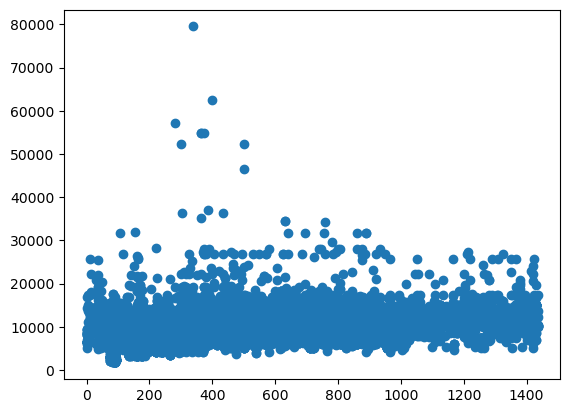

In [150]:
plt.scatter(data_new['Duration_Min'],data_new['Price'])
plt.show()

In [ ]:
# I don't find any linear relationship between dependent and numeric independent variables :( 
# so I feel linear regression may not be suitable for this prediction 
# Still I am creating a model for practice :)

In [151]:
data_new

,Airline,Source,Destination,Total_Stops,Price,Month,Duration_Min
0,IndiGo,Banglore,Delhi,non-stop,3897,March,170
1,Air India,Kolkata,Banglore,2 stops,7662,May,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,June,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,May,325
4,IndiGo,Banglore,Delhi,1 stop,13302,March,285
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,April,150
10679,Air India,Kolkata,Banglore,non-stop,4145,April,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,April,180
10681,Vistara,Banglore,Delhi,non-stop,12648,March,160


In [153]:
data_cat = data_new.select_dtypes(exclude = np.number)

In [154]:
data_cat

,Airline,Source,Destination,Total_Stops,Month
0,IndiGo,Banglore,Delhi,non-stop,March
1,Air India,Kolkata,Banglore,2 stops,May
2,Jet Airways,Delhi,Cochin,2 stops,June
3,IndiGo,Kolkata,Banglore,1 stop,May
4,IndiGo,Banglore,Delhi,1 stop,March
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,April
10679,Air India,Kolkata,Banglore,non-stop,April
10680,Jet Airways,Banglore,Delhi,non-stop,April
10681,Vistara,Banglore,Delhi,non-stop,March


In [155]:
data_cat = pd.get_dummies(data_cat)

In [156]:
data_cat

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Month_April,Month_June,Month_March,Month_May
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [162]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [164]:
data_num = data_new.select_dtypes(include = np.number)

In [165]:
data_num = data_num.reset_index().drop(columns = 'index')

In [168]:
data_train = pd.concat(data_cat,data_num)

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_10032\2959969041.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_train = pd.concat(data_cat,data_num)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [171]:
data_train = pd.concat([data_cat,data_num],axis = 1)

In [254]:
data_train

,level_0,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Month_April,Month_June,Month_March,Month_May,Price,Duration_Min
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,3897,170
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,7662,445
2,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,13882,1140
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6218,325
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,13302,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,10678,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,4107,150
10679,10679,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,4145,155
10680,10680,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,7229,180
10681,10681,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,12648,160


In [173]:
data_train_x = data_train.drop(columns = 'Price')

In [266]:
data_train_x

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Month_April,Month_June,Month_March,Month_May,Duration_Min
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,170
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,445
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1140
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,325
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,150
10679,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,155
10680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,180
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,160


In [175]:
data_train_y = data_train['Price']

In [176]:
data_train_y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [179]:
reg = LinearRegression()

In [267]:
reg.fit(data_train_x,data_train_y)

LinearRegression()

In [268]:
reg.intercept_

14168.151319107163

In [269]:
reg.coef_

array([-5.22468399e+03, -3.48104444e+03, -5.26819631e+03, -4.95721815e+03,
       -1.05296598e+03,  4.30348005e+04, -1.97258103e+03, -2.64432132e+03,
       -5.32363923e+03, -8.75300835e+03, -3.19890373e+03, -1.15823796e+03,
        3.71336105e+02,  1.83009889e+02, -5.49409011e+01,  1.13520142e+02,
       -6.12925236e+02,  1.13520142e+02, -5.49409011e+01,  3.71336105e+02,
       -6.12925236e+02,  1.83009889e+02, -1.59654415e+03,  5.67300653e+02,
        1.65632987e+03,  4.69119276e+03, -5.31827914e+03, -1.14298761e+03,
       -3.09008360e+02,  1.52157449e+03, -6.95785159e+01,  1.31677749e-01])

In [270]:
data_train_predict = reg.predict(data_train_x)

In [271]:
data_train_predict

array([ 6179.28594914, 11470.46590133, 13413.70846641, ...,
        7420.2927997 ,  7936.2835898 , 11140.78609063])

In [272]:
residual = data_train_y - data_train_predict

<Axes: xlabel='Price', ylabel='Density'>

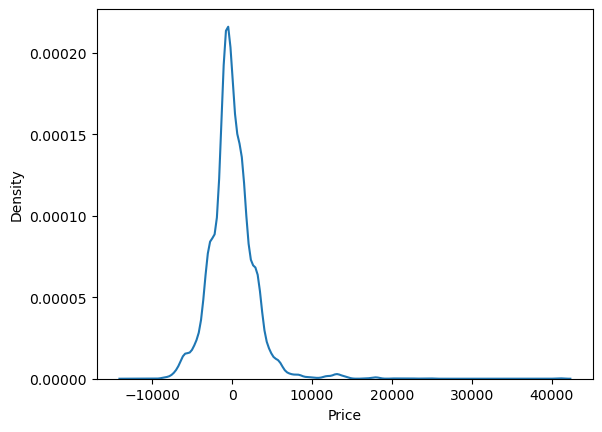

In [273]:
sns.kdeplot(residual)

In [274]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [275]:
print("Error Metrics Of Train Data")
Error_Metrics(data_train_y,data_train_predict)

Error Metrics Of Train Data
mse: 8234162.421731962 
rmse: 2869.523030353993 
mae: 1955.947050000856 
mape: 0.2358676244797466 
R-Score: 0.6127404068121127


## Working on Test data 

In [221]:
data_test = pd.read_csv('Flight_Test.csv')

In [222]:
data_test 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [223]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
# super no null values :)

In [224]:
data_test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [225]:
data_test['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [226]:
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'],dayfirst = True)

In [227]:
data_test['Month'] = data_test['Date_of_Journey'].dt.month

In [228]:
data_test['Month'].unique()

array([6, 5, 3, 4], dtype=int64)

In [229]:
data_test['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [232]:
data_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,June
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,May
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,May
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,May
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,June
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,June
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,March
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,March
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,March


In [234]:
data_test['Duration_Min'] = (pd.to_timedelta(data_test['Duration']).dt.seconds // 60).astype(str)

In [235]:
del data_test['Duration']
del data_test['Dep_Time']
del data_test['Arrival_Time']


In [237]:
del data_test['Additional_Info']

In [238]:
data_test['Duration_Min'] = data_test['Duration_Min'].astype(int)

In [240]:
data_test

,Airline,Source,Destination,Route,Total_Stops,Month,Duration_Min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,June,655
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,May,240
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,May,1425
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,May,780
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,June,170
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,June,1435
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,non-stop,March,155
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,March,395
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,1 stop,March,915


In [242]:
del data_test['Route']

In [243]:
plt.scatter(data_test['Duration_Min'],data_test['Price'])
plt.show()

KeyError: 'Price'

In [ ]:
# Price column is not given in test data. Ideally, we need to predict the Price


In [244]:
data_test_cat = data_test.select_dtypes(exclude = np.number)


In [247]:
data_test_cat

,Airline,Source,Destination,Total_Stops,Month
0,Jet Airways,Delhi,Cochin,1 stop,June
1,IndiGo,Kolkata,Banglore,1 stop,May
2,Jet Airways,Delhi,Cochin,1 stop,May
3,Multiple carriers,Delhi,Cochin,1 stop,May
4,Air Asia,Banglore,Delhi,non-stop,June
...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,June
2667,IndiGo,Kolkata,Banglore,non-stop,March
2668,Jet Airways,Delhi,Cochin,1 stop,March
2669,Air India,Delhi,Cochin,1 stop,March


In [248]:
data_test_cat = pd.get_dummies(data_test_cat)

In [249]:
data_test_cat = data_test_cat.reset_index().drop(columns = 'index')

In [250]:
data_test_num = data_test.select_dtypes(include = np.number)

In [251]:
data_test_num = data_test_num.reset_index().drop(columns = 'index')

In [252]:
data_test = pd.concat([data_test_cat,data_test_num],axis = 1)

In [253]:
data_test

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Month_April,Month_June,Month_March,Month_May,Duration_Min
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,655
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,240
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1425
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,780
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1435
2667,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,155
2668,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,395
2669,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,915


In [256]:
reg.fit(data_test,0)

TypeError: Singleton array array(0) cannot be considered a valid collection.

In [ ]:
# now, i dont have my y or dependent value - how can i fit ?

In [257]:
test_predict = reg.predict(data_test)

ValueError: X has 31 features, but LinearRegression is expecting 33 features as input.

In [ ]:
# There is a difference in column numbers between train_x, test_x . We need to fix it here

In [262]:
data_train_x.columns.value_counts()

level_0                                      1
Source_Mumbai                                1
Month_May                                    1
Month_March                                  1
Month_June                                   1
Month_April                                  1
Total_Stops_non-stop                         1
Total_Stops_4 stops                          1
Total_Stops_3 stops                          1
Total_Stops_2 stops                          1
Total_Stops_1 stop                           1
Destination_Kolkata                          1
Destination_Hyderabad                        1
Destination_Delhi                            1
Destination_Cochin                           1
Destination_Banglore                         1
Source_Kolkata                               1
Airline_Air Asia                             1
Source_Delhi                                 1
Source_Chennai                               1
Source_Banglore                              1
Airline_Vista

In [261]:
data_test.columns.value_counts()

Airline_Air Asia                             1
Destination_Banglore                         1
Month_May                                    1
Month_March                                  1
Month_June                                   1
Month_April                                  1
Total_Stops_non-stop                         1
Total_Stops_4 stops                          1
Total_Stops_3 stops                          1
Total_Stops_2 stops                          1
Total_Stops_1 stop                           1
Destination_Kolkata                          1
Destination_Hyderabad                        1
Destination_Delhi                            1
Destination_Cochin                           1
Source_Mumbai                                1
Airline_Air India                            1
Source_Kolkata                               1
Source_Delhi                                 1
Source_Chennai                               1
Source_Banglore                              1
Airline_Vista

In [ ]:
# Sorting this issue in Excel sheet :)

In [ ]:
# 2different columns found : Airline_Trujet , level_0 
# i can drop Level_0 since it is having serial number data only
# but not sure how to handle Airline_Trujet

In [265]:
del data_train_x['level_0']

In [ ]:
 # now again i need to go back and train the model with 32 columns 

In [277]:
test_predict = reg.predict(data_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Airline_Trujet


In [ ]:
# now - my model is not able to handle the missing column 'Airline_Trujet'
# Model - OverFitting , how to deal with missing value in test data ?


In [ ]:
# Double checking test data for missing value 'Airline_Trujet'

In [279]:
data_check = pd.read_csv('Flight_Test.csv')

In [281]:
data_check['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [282]:
data_new['Airline'].nunique() #from train data

12

In [283]:
data_check['Airline'].nunique() #from test data

11